# Building Linear Regression Model to predict housing prices

In [195]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# the data set for the model
df = pd.read_csv('housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [197]:
df.count()

SquareFeet      50000
Bedrooms        50000
Bathrooms       50000
Neighborhood    50000
YearBuilt       50000
Price           50000
dtype: int64

In [198]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [199]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [201]:
df.groupby('Neighborhood')['Price'].mean()

Neighborhood
Rural     224096.126040
Suburb    223234.189857
Urban     227166.197139
Name: Price, dtype: float64

In [220]:
df['Price'].mean()

224827.32515099045

In [200]:
# Add column of is_urban and make the value of urban equal to 1 and suburb and rural equal to 0
df['is_urban'] = df['Neighborhood'].map({
    'Urban': 1,
    'Suburb': 0,
    'Rural': 0})


In [202]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
is_urban          int64
dtype: object

In [203]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,is_urban
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0
2,1860,2,1,Suburb,1970,306891.012076,0
3,2294,2,1,Urban,1996,206786.787153,1
4,2130,5,2,Suburb,2001,272436.239065,0


In [204]:
print(df.columns)

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price', 'is_urban'],
      dtype='object')


In [206]:
x = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'is_urban']]
y = df['Price']

In [207]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [208]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [209]:
y_train

38094    136609.468801
40624    185326.815719
49425    173386.041546
35734    165809.288253
41708    154269.659133
             ...      
11284    324396.846219
44732    319266.944411
38158    248092.662727
860      132414.177622
15795    288751.049986
Name: Price, Length: 35000, dtype: float64

In [210]:
model = LinearRegression()
model.fit(X_train ,y_train)

LinearRegression()

In [222]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price', 'is_urban'],
      dtype='object')

In [211]:
model.coef_

array([ 9.94335679e+01,  5.28573455e+03,  3.01905308e+03, -9.62636295e-01,
        1.75199905e+03])

In [224]:
model.intercept_

2061.800550501095

In [232]:
# Print Start value and Coefficients of my Regression Model
coef = pd.DataFrame(model.coef_, x.columns, columns=['Coef'])
inter = pd.DataFrame(model.intercept_, index=[y.name], columns=['Start Value'])
print(inter)
print(coef)

       Start Value
Price  2061.800551
                   Coef
SquareFeet    99.433568
Bedrooms    5285.734549
Bathrooms   3019.053083
YearBuilt     -0.962636
is_urban    1751.999050


In [213]:
predict = model.predict(X_test)
predict

array([217935.49734708, 135190.97899164, 255488.87809567, ...,
       314301.30559006, 163123.45801563, 234527.22348178])

In [214]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(y_test, predict))
print("Mean Squared Error: ", mean_squared_error(y_test, predict))
print("Root of Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, predict)))

Mean Absolute Error:  39738.237209923696
Mean Squared Error:  2468143223.2368965
Root of Mean Squared Error:  49680.41086018609


In [215]:
residuals = y_test - predict
residuals

33553   -47100.461634
9427     -8277.508994
199      -8876.995004
12447   -13932.526117
39489    -6244.957778
             ...     
15168   -50185.091836
49241    42849.917124
39317    42799.318051
42191    66521.445743
15109    -8588.854889
Name: Price, Length: 15000, dtype: float64

((array([-3.90968256, -3.68991627, -3.56950385, ...,  3.56950385,
          3.68991627,  3.90968256]),
  array([-177667.99086415, -170272.14466983, -164770.92069681, ...,
          175221.95413716,  181272.97185332,  186305.74197723])),
 (49686.18036948232, 255.02251255951805, 0.999881323965707))

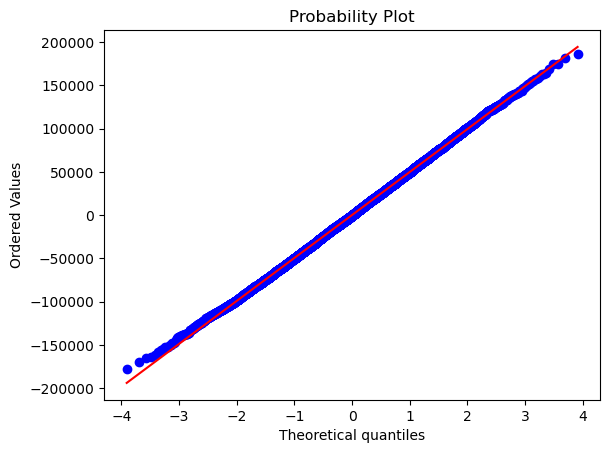

In [216]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist='norm', plot=pylab)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


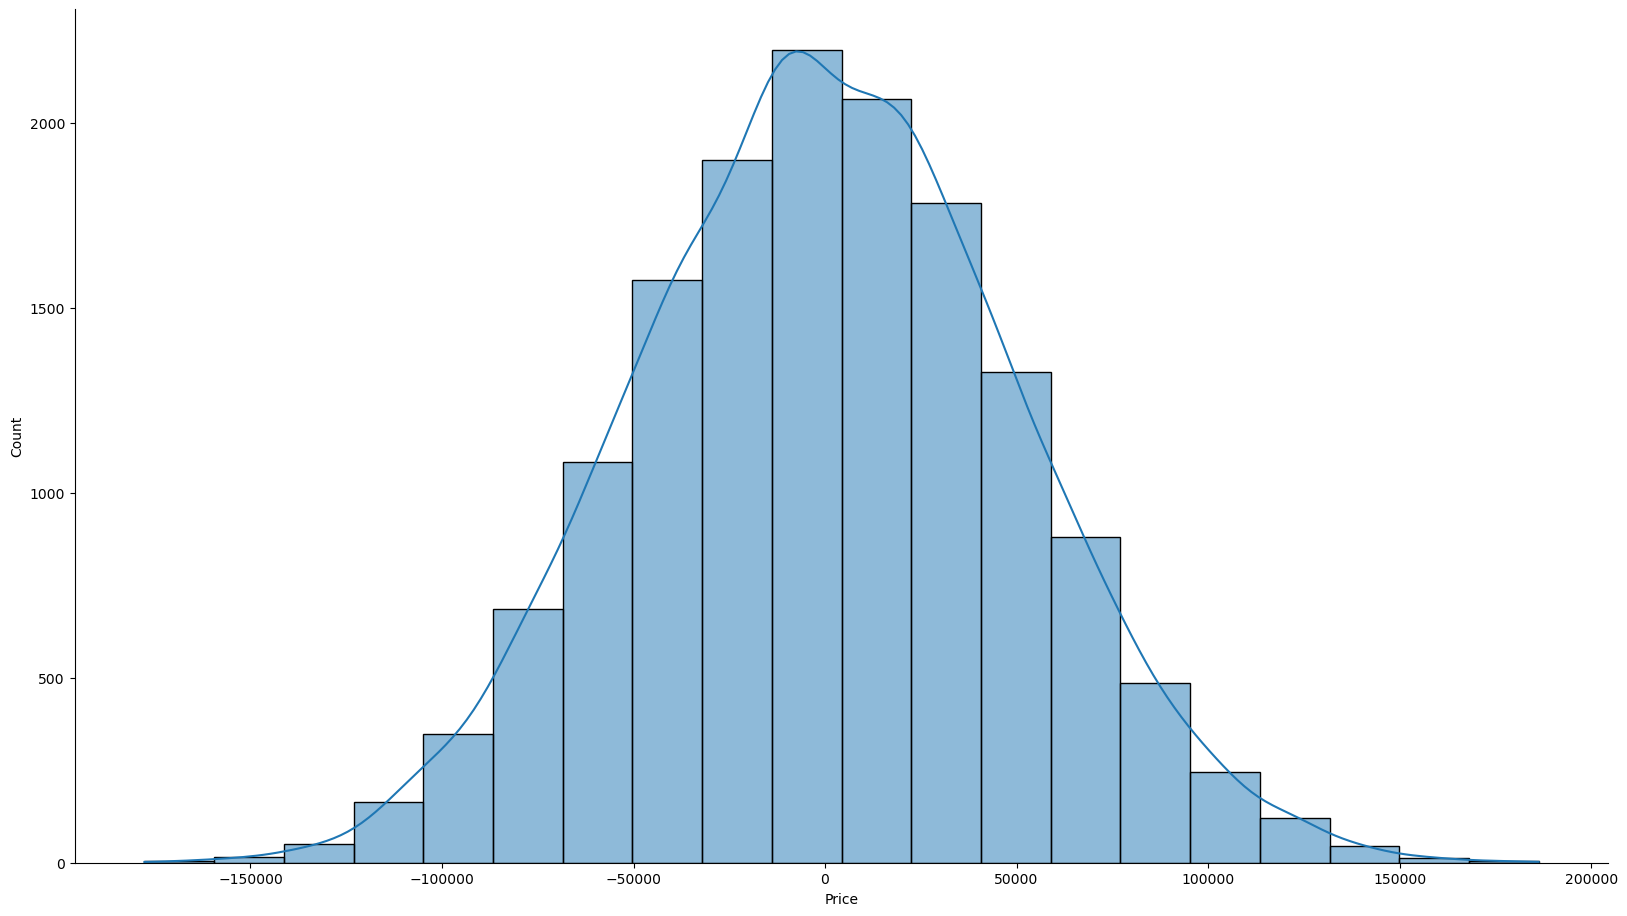

In [217]:
g = sns.displot(residuals, bins=20, kde=True)
g.fig.set_size_inches(20,10)
plt.show()